In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# # Using ipynb import functions defined in other nb
# sys.path.append("myfun/")
# from ipynb.fs.defs.myfun_load_dataset import *
# from ipynb.fs.full.myfun_models import *
# from ipynb.fs.full.myfun_nn import *
# from ipynb.fs.defs.myfun_plot import *

2023-09-10 21:11:09.172352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-07_17-28-26_df1-2-3_1it-POST
2023-09-07_18-41-29_df8-9_5it-POST
2023-09-07_19-51-16_df1-2-3-4-5-6-7-8-9-10_1it-POST
2023-09-07_23-32-38_df1-2-3-4-5-6-7-8-9-10_1it-POST
2023-09-08_02-31-32_df1-2-3-4-5-6-7-8-9-10_500it-POST
2023-09-09_02-13-05_df1-2-3-4-5-6-7-8-9-10_350it-POST
2023-09-09_17-34-04_df1-2-3-4-5-6-7-8-9-10-LINLOG-POST


In [4]:
last = sorted(os.listdir(target_dir))[-1]
last

'2023-09-09_17-34-04_df1-2-3-4-5-6-7-8-9-10-LINLOG-POST'

In [5]:
file = "2023-09-08_02-31-32_df1-2-3-4-5-6-7-8-9-10_500it-POST"

In [6]:
path = target_dir + file
for name in sorted(os.listdir(path)):
    print(name)

08 SGD - v0 in all dfs post and with all NN - Jupyter Notebook.pdf
info_alldataset.txt
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-02.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-04.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-10.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-ALL.svg
v0_df1-2-3-4-5-6-7-8-9-10_500iter_NN-ALL-comparing.svg


### Load the df

In [7]:
namefile = '/info_alldataset.txt'
colnames = ['t_list', 'x_list', 'v_list', 'v0_scn', 'v0_scn_mean', 'n_scn', 'N. file', 'iter', 'DOE', 'processed']

In [8]:
info_alldataset = pd.read_csv(path + namefile, sep=',', usecols= colnames)

## Plot

In [9]:
info_alldataset

,t_list,x_list,v_list,v0_scn,v0_scn_mean,n_scn,N. file,iter,DOE,processed
0,"[14.240000000000002, 14.290000000000003, 14.34...","[array([47.39131046, 48.74372173, 50.096133 ,...","[[27.04822540283203, 28.37846565246582, 27.676...","[30, 29.921209272631124, 29.84504490284121, 29...",27.778101,0,1,500,"[1, 2, 1]",post
1,"[23.64, 23.69, 23.740000000000002, 23.79000000...","[array([39.20354853, 40.53283673, 41.86212493,...","[[26.585763931274414, 25.34468650817871, 30.98...","[30, 30.03948068730416, 30.077645351698177, 30...",31.113355,1,1,500,"[1, 2, 1]",post
2,"[72.44, 72.49, 72.53999999999999, 72.59, 72.64...","[array([ 2.73338702, 4.04771588, 5.36204474,...","[[26.286577224731445, 29.519899368286133, 28.5...","[30, 29.941697349840737, 29.88533812135341, 29...",28.355865,2,1,500,"[1, 2, 1]",post
3,"[84.24000000000001, 84.29, 84.34, 84.390000000...","[array([21.74922515, 23.12561141, 24.50199767,...","[[27.527725219726562, 26.87315559387207, 29.90...","[30, 29.983145519027797, 29.966852854088017, 2...",29.574075,3,1,190,"[1, 2, 1]",post
4,"[131.64, 131.69, 131.74, 131.79, 131.84, 131.8...","[array([29.92533961, 31.38577853, 32.84621745,...","[[29.208778381347656, 28.70818519592285, 28.44...","[30, 29.9480964210731, 29.897922961443907, 29....",28.536319,4,1,500,"[1, 2, 1]",post
...,...,...,...,...,...,...,...,...,...,...
619,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 48.87877796, 49.33946794,...","[[9.213799476623535, 10.958330154418945, 22.61...","[30, 29.75396388691982, 29.516128977608922, 29...",23.061782,17,10,500,"[1, 10, 1]",post
620,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 41.94955972, 42.49173682,...","[[10.843542098999023, 4.979713439941406, 18.20...","[30, 29.60683911392471, 29.226783590718448, 28...",18.912863,18,10,500,"[1, 10, 1]",post
621,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.80286851, 31.19525276,...","[[27.847684860229492, 27.818811416625977, 27.7...","[30, 29.850353129658785, 29.70444743107601, 29...",24.492994,19,10,500,"[1, 10, 1]",post
622,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 30.94979901, 31.73776712,...","[[15.75936222076416, 14.911964416503906, 15.82...","[30, 29.63678726055011, 29.28265483958656, 28....",16.633767,20,10,500,"[1, 10, 1]",post


In [8]:
# Create the model NN
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment

# params
NUM_ITER = int(last.split("_")[-1].split("it")[0])
flag_save = False

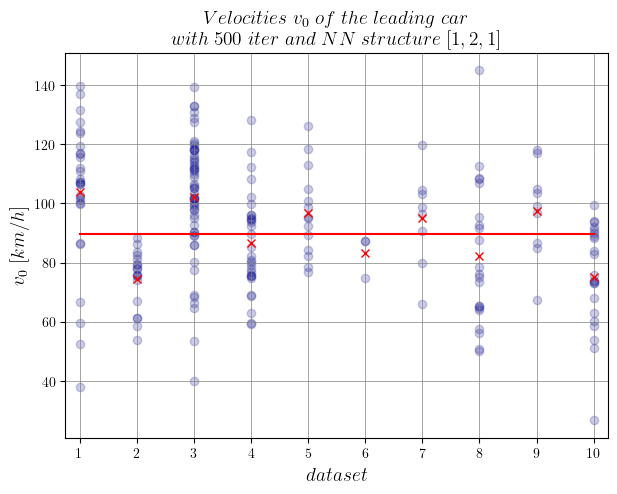

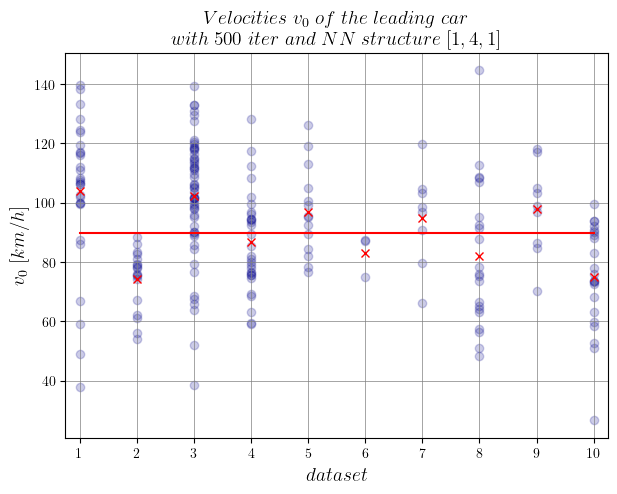

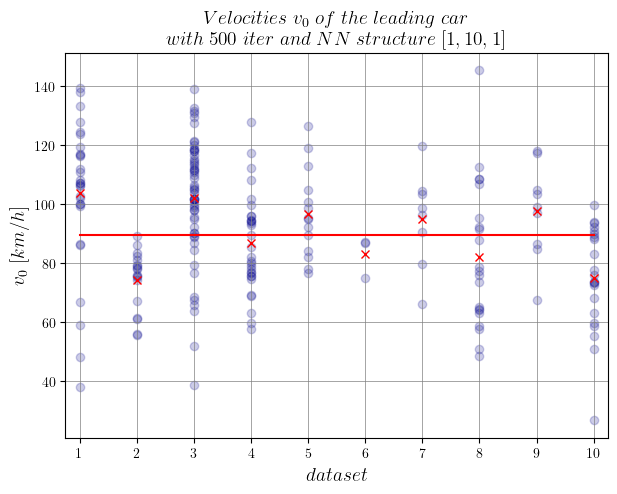

In [9]:
ms2kmh = 3.6

for d in DOE:
        
    # Initialize the figure
    width, height = 7, 5
    fig, ax = plt.subplots(figsize=(width,height))
    
#     # Before to save in csv
#     info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]   
    
    for _, scn in info_dataset.iterrows():
        
        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
                   "\n"  # Newline: the backslash is interpreted as usual
                 fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(d)}$",fontsize=14)

    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);

    plt.show()
    
    # Save figure
    if flag_save:

        title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-{str(d[1]).zfill(2)}"     
        fig.savefig(path+title+ext, bbox_inches='tight')

### Plot together

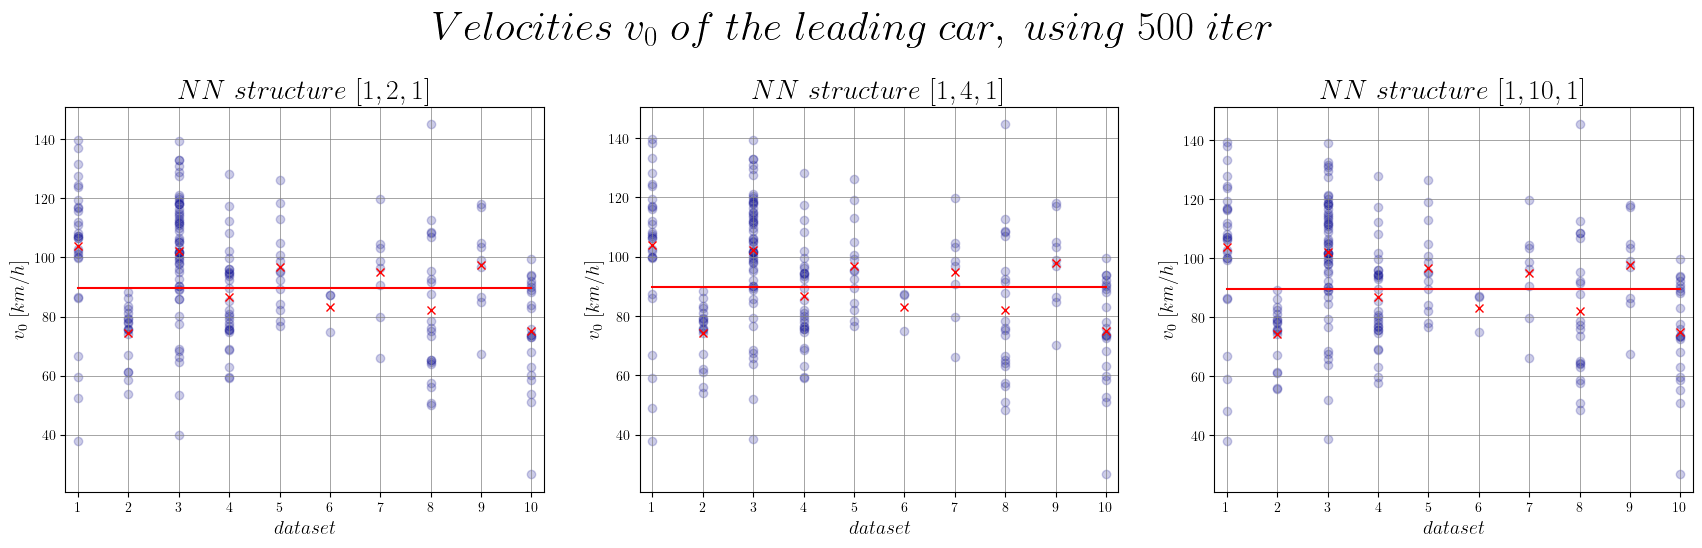

In [10]:
# define subplot grid
width, height = 7, 5
nfig = len(DOE)

fig, axes = plt.subplots(nrows=1, ncols=nfig, figsize = (width*nfig,height))
plt.subplots_adjust(hspace=0.4)

suptitle = fr"$Velocities\ v_{0}\ of\ the\ leading\ car,\ using\ {NUM_ITER}\ iter$"
fig.suptitle(suptitle, fontsize=30, y=1.075)

ms2kmh = 3.6

for ax, d in zip(axes.ravel(), DOE):

#     # Before to save in csv
#     info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]   
    
    for _, scn in info_dataset.iterrows():

        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')
        
    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$NN\ structure\ {d}$",fontsize=20)

    # Limits
    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    
plt.show()

In [11]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-ALL"     
    fig.savefig(path+title+ext, bbox_inches='tight')

### Plot comparing

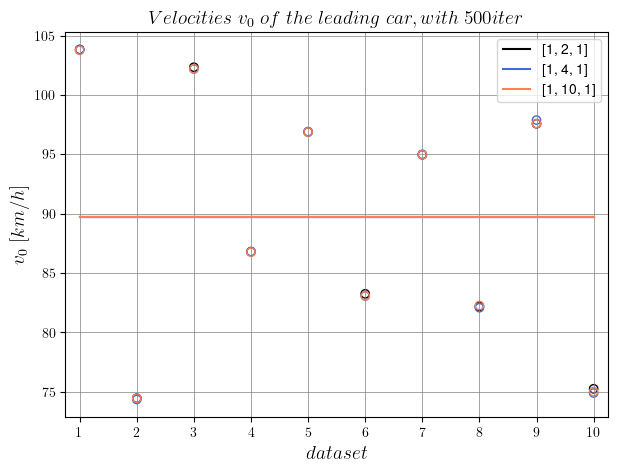

In [12]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['black', 'royalblue', 'coral']

for step, d in enumerate(DOE):   
        
#     # Before to save in csv
#     info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]
    
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0_scn_mean']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=str(d))

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car, with\ {NUM_ITER}\ iter$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

In [13]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}iter_NN-ALL-comparing"
    fig.savefig(path+title+ext, bbox_inches='tight')